In [1]:
from env import MazeEnv

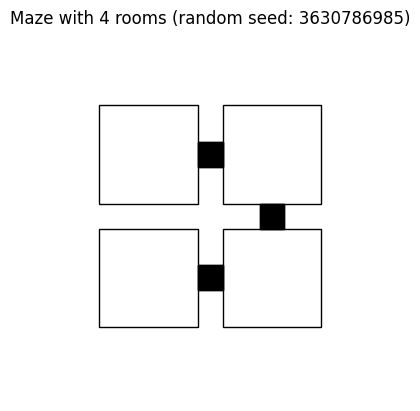

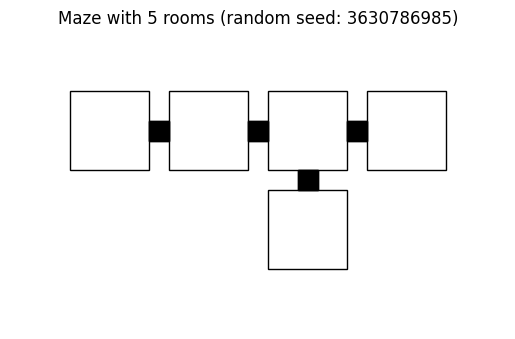

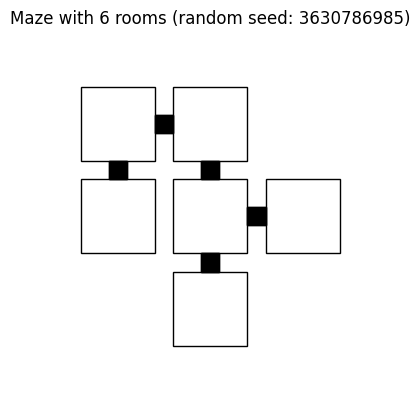

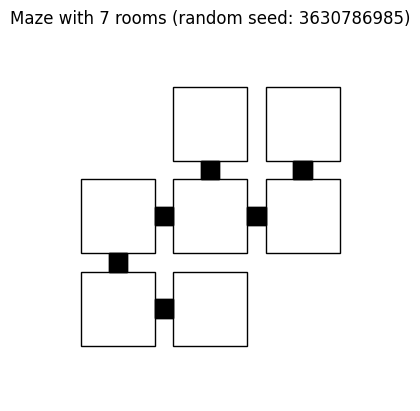

In [4]:
for i in range(4):
    env = MazeEnv(n_rooms=i + 4)
    env.reset()
    env.render()
